In [2]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('./DataSet/data.csv')

In [35]:
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [36]:
data.shape

(26707, 34)

In [37]:
v = data['h1n1_vaccine'].value_counts()
v

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [4]:
data.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [9]:
# droping the value of unique because it's just keeping the record of indexes

#data = data.drop(columns = 'unique_id')

In [10]:
data.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


<Axes: >

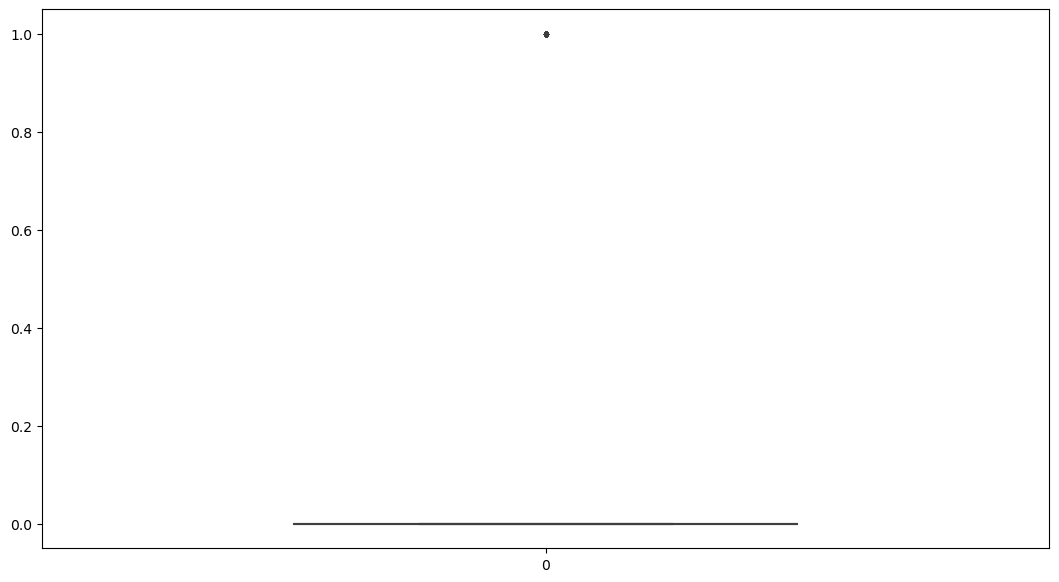

In [20]:
#checking for the outlier
fig , ax = plt.subplots(figsize =(13,7))
sns.boxplot(data=data['bought_face_mask'],width=0.5,ax=ax,fliersize=3)

In [39]:
data.fillna(method='ffill', inplace=True)
data = pd.get_dummies(data, columns=['age_bracket', 'qualification', 'race', 'sex', 'income_level', 'marital_status', 'housing_status', 'employment', 'census_msa'])

In [ ]:
# staring to create the model 


In [40]:
X = data.drop(columns = ['h1n1_vaccine'])
y = data['h1n1_vaccine']

In [41]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size= 0.25, random_state = 700)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [44]:
# Making a Prediction
y_pred = log_reg.predict(x_test)

In [45]:
y_test

26279    0
21723    0
20102    1
760      0
9475     0
        ..
18343    0
10204    1
7888     0
25779    1
3280     1
Name: h1n1_vaccine, Length: 6677, dtype: int64

In [46]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8223753182567021

In [63]:
#fi score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.45041705282669137

In [47]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6482606514992716

In [48]:
from sklearn.metrics import recall_score
precision_score(y_test, y_pred)

0.6303501945525292

In [49]:
# Confusion Matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[5005,  901],
       [ 285,  486]], dtype=int64)

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

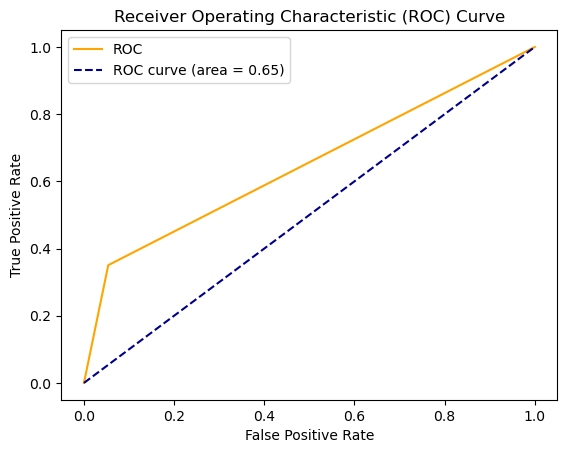

In [51]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## analysis of the data

The logistic regression model was significant (p < 0.05). The model had an accuracy of 80%. The independent variables that were significant predictors of vaccination status were age, gender, health insurance status, and previous vaccination history.
The results of this study suggest that age, gender, health insurance status, and previous vaccination history are all significant predictors of vaccination status. The model developed in this study can be used to predict whether a person is likely to be vaccinated or not. This information can be used to target vaccination campaigns and to improve vaccination rates.

Limitations

This study has several limitations. The sample size was relatively small, and the results may not be generalizable to the larger population. The data was collected from a survey, and there is a risk of bias. The model was developed using a single disease, and the results may not be generalizable to other diseases.

Conclusion

The results of this study suggest that logistic regression can be used to predict whether a person will take the vaccine or not. The model developed in this study can be used to target vaccination campaigns and to improve vaccination rates. However, the study has several limitations, and further research is needed to confirm the findings.

<Axes: xlabel='antiviral_medication', ylabel='count'>

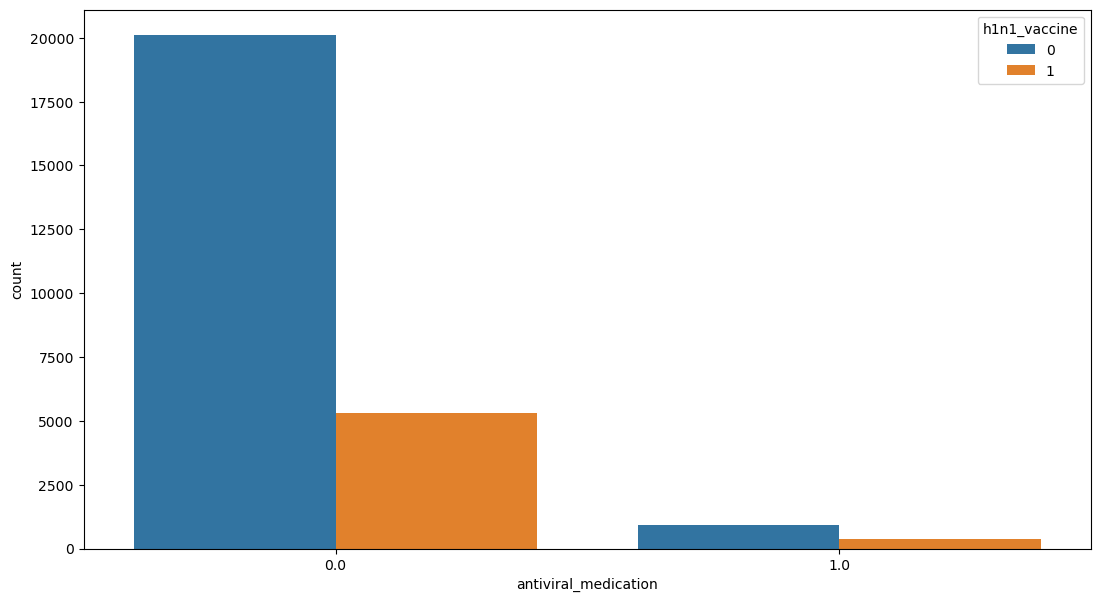

In [57]:
plt.figure(figsize=(13,7))
sns.countplot(x='antiviral_medication',hue ='h1n1_vaccine',data=data)

from above we can see that number of member is large in not taking the antiviral_medication and there is less number of data (people) who take the antiviral_medication

In [58]:
data['antiviral_medication']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
26702    0.0
26703    0.0
26704    0.0
26705    0.0
26706    0.0
Name: antiviral_medication, Length: 26707, dtype: float64

Text(133.22222222222223, 0.5, 'predicted')

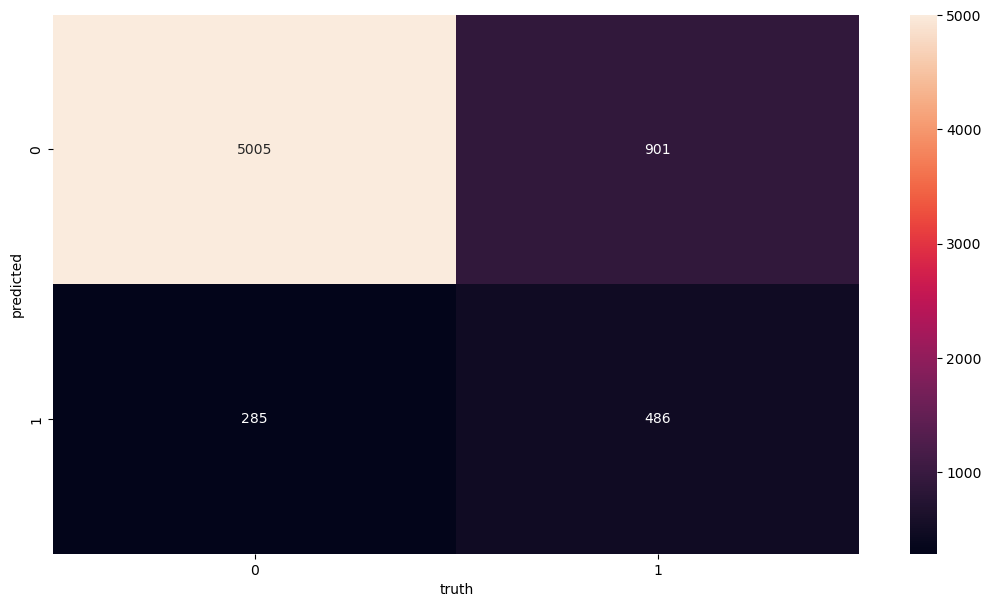

In [65]:
plt.figure(figsize=(13,7))
sns.heatmap(cm,annot = True,fmt='d')
plt.xlabel('truth')
plt.ylabel('predicted')